<a href="https://colab.research.google.com/github/quoctrung2005/TTNT/blob/main/TOMAU(T%C6%AF%C6%A0NGTAC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%%writefile graph.txt
0 1 1 0 1
1 0 1 1 0
1 1 0 1 1
0 1 1 0 0
1 0 1 0 0


Overwriting graph.txt


CHỌN THỨ TỰ TÔ ĐỈNH:
1 - Theo bậc GIẢM DẦN
2 - Theo bậc TĂNG DẦN
Nhập lựa chọn (1 hoặc 2): 2

 Thứ tự tô đỉnh:
D(bậc 2)  E(bậc 2)  A(bậc 3)  B(bậc 3)  C(bậc 4)  


===== BƯỚC 1: TÔ ĐỈNH D =====
 Màu CÓ THỂ TÔ : blue, red, yellow, green
 Màu BỊ CẤM   : 
➡ Nhập màu bạn chọn: blue


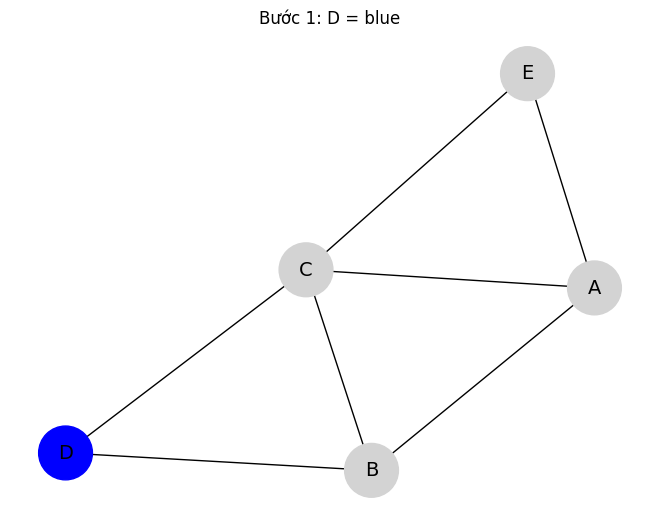


===== BƯỚC 2: TÔ ĐỈNH E =====
 Màu CÓ THỂ TÔ : blue, red, yellow, green
 Màu BỊ CẤM   : 
➡ Nhập màu bạn chọn: red


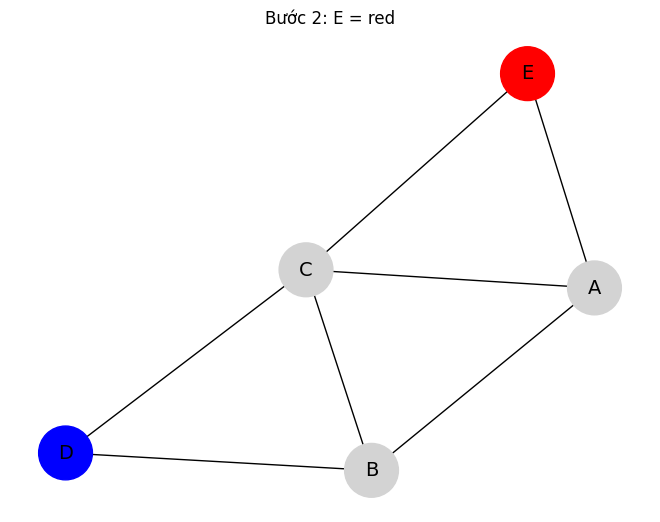


===== BƯỚC 3: TÔ ĐỈNH A =====
 Màu CÓ THỂ TÔ : blue, yellow, green
 Màu BỊ CẤM   : red
➡ Nhập màu bạn chọn: yellow


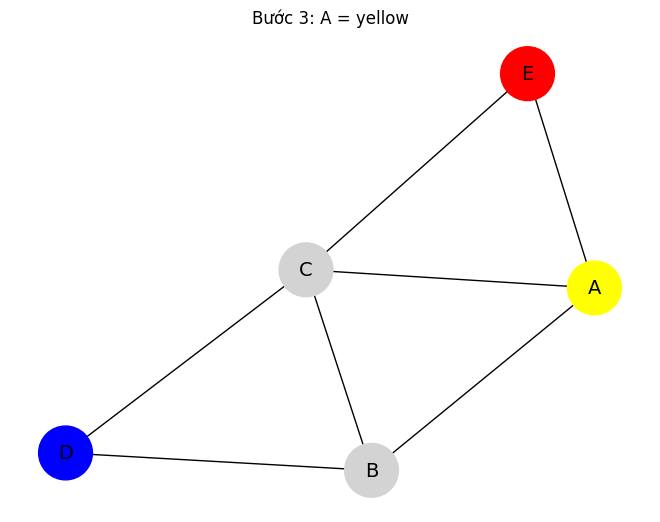


===== BƯỚC 4: TÔ ĐỈNH B =====
 Màu CÓ THỂ TÔ : red, green
 Màu BỊ CẤM   : blue, yellow
➡ Nhập màu bạn chọn: green


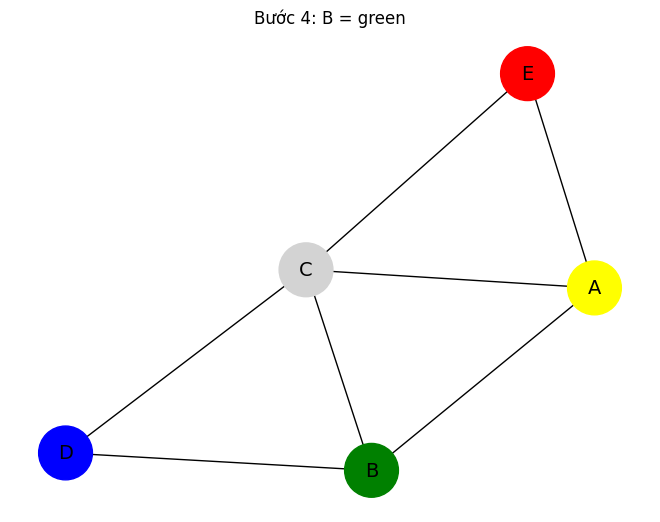


===== BƯỚC 5: TÔ ĐỈNH C =====
 Màu CÓ THỂ TÔ : 
 Màu BỊ CẤM   : blue, yellow, green, red
➡ Nhập màu bạn chọn: green
 Màu KHÔNG HỢP LỆ, chọn lại!


KeyboardInterrupt: Interrupted by user

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# ================== ĐỌC MA TRẬN KỀ ==================
def read_adj_matrix(filename):
    adj = []
    with open(filename) as f:
        for line in f:
            adj.append(list(map(int, line.split())))
    return adj


# ========== LẤY DANH SÁCH MÀU CÓ THỂ TÔ ==========
def get_available_colors(v, colors, solution, adj, index, nodes):
    used = set()
    for u in nodes:
        if adj[index[v]][index[u]] == 1:   # ← SỬA Ở ĐÂY
            if solution[u] is not None:
                used.add(solution[u])
    return [c for c in colors if c not in used]



# ================== TÔ MÀU TƯƠNG TÁC ==================
def color_graph_interactive(adj):
    n = len(adj)
    nodes = [chr(ord('A') + i) for i in range(n)]
    colors = ["blue", "red", "yellow", "green"]

    # ---- Tạo đồ thị ----
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] == 1:
                G.add_edge(nodes[i], nodes[j])

    # ---- Tính bậc ----
    degree = {nodes[i]: sum(adj[i]) for i in range(n)}

    # ---- Chọn thứ tự sắp xếp ----
    print("CHỌN THỨ TỰ TÔ ĐỈNH:")
    print("1 - Theo bậc GIẢM DẦN")
    print("2 - Theo bậc TĂNG DẦN")

    while True:
        choice = input("Nhập lựa chọn (1 hoặc 2): ").strip()
        if choice in ["1", "2"]:
            break
        print(" Lựa chọn không hợp lệ!")

    reverse = True if choice == "1" else False
    order = sorted(degree.keys(), key=lambda x: degree[x], reverse=reverse)

    print("\n Thứ tự tô đỉnh:")
    for v in order:
        print(f"{v}(bậc {degree[v]})", end="  ")
    print("\n")

    # ---- Chuẩn bị ----
    index = {nodes[i]: i for i in range(n)}
    solution = {v: None for v in nodes}

    pos = nx.spring_layout(G, seed=42)
    plt.ion()

    # ---- Tô màu từng bước ----
    step = 1
    for v in order:
        print(f"\n===== BƯỚC {step}: TÔ ĐỈNH {v} =====")

        available_colors = get_available_colors(
            v, colors, solution, adj, index, nodes
        )

        print(" Màu CÓ THỂ TÔ :", ", ".join(available_colors))
        print(" Màu BỊ CẤM   :", ", ".join(set(colors) - set(available_colors)))

        while True:
            chosen = input("➡ Nhập màu bạn chọn: ").strip().lower()
            if chosen not in available_colors:
                print(" Màu KHÔNG HỢP LỆ, chọn lại!")
                continue
            break

        solution[v] = chosen

        # ---- VẼ ĐỒ THỊ ----
        plt.clf()
        node_colors = [
            solution[node] if solution[node] else "lightgray"
            for node in G.nodes()
        ]

        nx.draw(
            G,
            pos,
            with_labels=True,
            node_color=node_colors,
            node_size=1500,
            font_size=14,
            edge_color="black"
        )

        plt.title(f"Bước {step}: {v} = {chosen}")
        plt.pause(0.5)

        step += 1

    plt.ioff()
    plt.show()

    # ---- Kết quả cuối ----
    print("\n KẾT QUẢ CUỐI:")
    for v in solution:
        print(f"{v} → {solution[v]}")


# ================== MAIN ==================
def main():
    adj = read_adj_matrix("graph.txt")
    color_graph_interactive(adj)


if __name__ == "__main__":
    main()
